<a href="https://colab.research.google.com/github/Nishant-Desai/CS532_MentalHealthAnalysis/blob/main/Bio_NLP_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Mechanism on Older Data

### Dataframe Creation

In [ ]:
import pandas as pd
tweets_csv = r"C:\Users\aditi\Downloads\MentalTwitter\Mental-Health-Twitter.csv"

desired_column_name = 'post_text'

df = pd.read_csv(tweets_csv)

desired_column = df[desired_column_name]

new_df = pd.DataFrame({desired_column_name: desired_column})

print(new_df)

                                               post_text
0      It's just over 2 years since I was diagnosed w...
1      It's Sunday, I need a break, so I'm planning t...
2      Awake but tired. I need to sleep but my brain ...
3      RT @SewHQ: #Retro bears make perfect gifts and...
4      It’s hard to say whether packing lists are mak...
...                                                  ...
19976              A day without sunshine is like night.
19977  Boren's Laws: (1) When in charge, ponder. (2) ...
19978  The flow chart is a most thoroughly oversold p...
19979  Ships are safe in harbor, but they were never ...
19980     Black holes are where God is dividing by zero.

[19981 rows x 1 columns]


In [ ]:
#Google Colab Load data
from google.colab import files

uploaded = files.upload()
tweets_csv = list(uploaded.keys())[0]
import pandas as pd

desired_column_name = 'post_text'

df = pd.read_csv(tweets_csv)

desired_column = df[desired_column_name]

new_df = pd.DataFrame({desired_column_name: desired_column})

print(new_df)


Saving Mental-Health-Twitter.csv to Mental-Health-Twitter.csv
                                               post_text
0      It's just over 2 years since I was diagnosed w...
1      It's Sunday, I need a break, so I'm planning t...
2      Awake but tired. I need to sleep but my brain ...
3      RT @SewHQ: #Retro bears make perfect gifts and...
4      It’s hard to say whether packing lists are mak...
...                                                  ...
19976              A day without sunshine is like night.
19977  Boren's Laws: (1) When in charge, ponder. (2) ...
19978  The flow chart is a most thoroughly oversold p...
19979  Ships are safe in harbor, but they were never ...
19980     Black holes are where God is dividing by zero.

[19981 rows x 1 columns]


In [ ]:
df.columns

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')

# Sentiment Analysis

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

#df = pd.read_csv('your_dataset.csv')

SA_df = new_df
# Explore the dataset
print(SA_df.head())

# Preprocess the data
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    return ' '.join(words)

SA_df['cleaned_text'] = SA_df['post_text'].apply(preprocess_text)

# Sentiment analysis using NLTK's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the entire dataset
SA_df['predicted_sentiment'] = SA_df['cleaned_text'].apply(analyze_sentiment)

# Display the results
print(SA_df[['cleaned_text', 'predicted_sentiment']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                           post_text
0  It's just over 2 years since I was diagnosed w...
1  It's Sunday, I need a break, so I'm planning t...
2  Awake but tired. I need to sleep but my brain ...
3  RT @SewHQ: #Retro bears make perfect gifts and...
4  It’s hard to say whether packing lists are mak...
                                            cleaned_text predicted_sentiment
0      years since diagnosed anxiety depression today...            negative
1      sunday need break planning spend little time p...             neutral
2                     awake tired need sleep brain ideas            negative
3      rt sewhq retro bears make perfect gifts great ...            positive
4      hard say whether packing lists making life eas...            positive
...                                                  ...                 ...
19995                    day without sunshine like night            negative
19996  boren laws charge ponder trouble delegate doub...          

In [ ]:
positive_tweets = SA_df[SA_df['predicted_sentiment'] == 'positive']
print(positive_tweets)

                                               post_text  \
3      RT @SewHQ: #Retro bears make perfect gifts and...   
4      It’s hard to say whether packing lists are mak...   
13     Back at the house, moving stuff. It’s so peace...   
17                   Packing and purging. Feels good 😊👍🏼   
18     In B&amp;Q looking at internal doors. Fun times 😉   
...                                                  ...   
19991  Economics is extremely useful as a form of emp...   
19992  After winning the pennant one year, Casey Sten...   
19994  You will have good luck and overcome many hard...   
19998  Ships are safe in harbor, but they were never ...   
19999     Black holes are where God is dividing by zero.   

                                            cleaned_text predicted_sentiment  
3      rt sewhq retro bears make perfect gifts great ...            positive  
4      hard say whether packing lists making life eas...            positive  
13                      back house moving 

### Support Mechanism Categorization

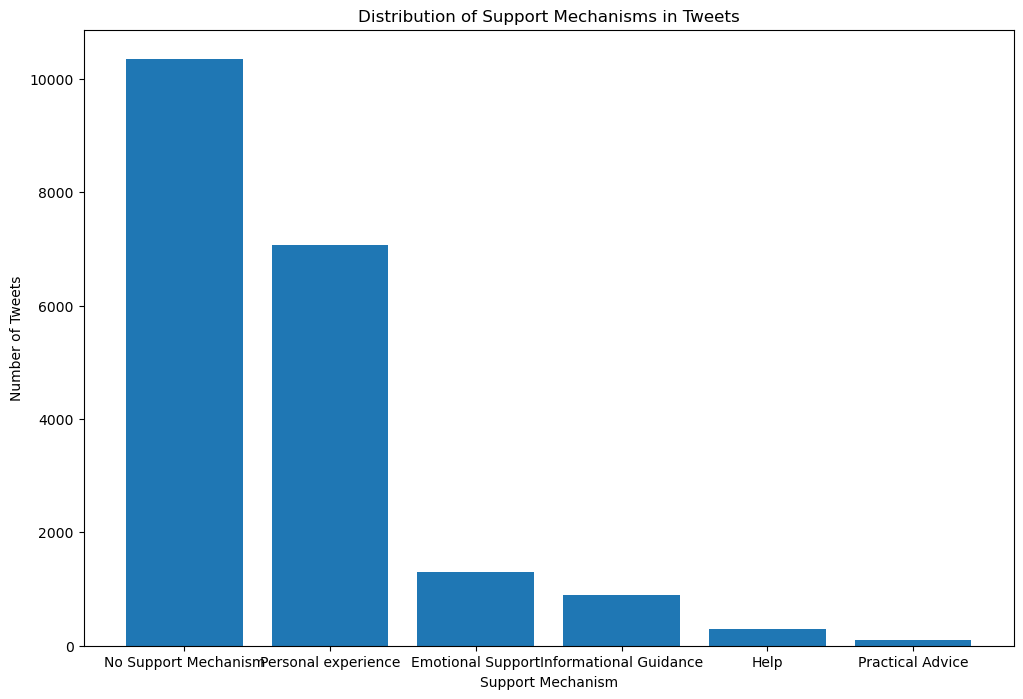

Tweets with Support Mechanism:
                                               post_text    support_mechanism
0      It's just over 2 years since I was diagnosed w...  Personal experience
1      It's Sunday, I need a break, so I'm planning t...  Personal experience
2      Awake but tired. I need to sleep but my brain ...  Personal experience
5      Making packing lists is my new hobby... #movin...  Personal experience
14     Urgh. Anxiety. FFS where does it come from?! (...  Personal experience
...                                                  ...                  ...
19973  After winning the pennant one year, Casey Sten...  Personal experience
19974  Every why hath a wherefore. -- William Shakesp...  Personal experience
19975  You will have good luck and overcome many hard...  Personal experience
19978  The flow chart is a most thoroughly oversold p...  Personal experience
19979  Ships are safe in harbor, but they were never ...  Personal experience

[9634 rows x 2 columns]


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

tweets = df

# Function to identify support mechanisms in tweets
def identify_support_mechanism(tweet):
    personal_experience = ['I', 'me', 'my', 'mine', 'myself', 'experience', 'story', 'journey', 'struggle', 'battle', 'fight', 'overcome', 'cope', 'manage', 'survive', 'thrive']
    emotional_support = ['Encourage', 'reassure', 'comfort', 'empathize', 'sympathize', 'validate', 'understand', 'listen', 'care', 'love', 'hope', 'inspire', 'motivate', 'uplift']
    informational_guidance = ['Learn', 'understand', 'know', 'educate', 'inform', 'explain', 'clarify', 'simplify', 'demystify', 'guide', 'direct', 'refer', 'recommend', 'suggest']
    practical_advice = ['Tips', 'tricks', 'hacks', 'strategies', 'techniques', 'methods', 'tools', 'resources', 'services', 'products', 'apps', 'websites']
    help_keywords = ["help"]
    # Check for emotional support
    if any(keyword in tweet.lower() for keyword in emotional_support):
        return "Emotional Support"
    # Check for informational guidance
    elif any(keyword in tweet.lower() for keyword in informational_guidance):
        return "Informational Guidance"
    # Check for practical advice
    elif any(keyword in tweet.lower() for keyword in practical_advice):
        return "Practical Advice"
    elif any(keyword in tweet.lower() for keyword in help_keywords):
        return "Help"
    elif any(keyword in tweet.lower() for keyword in personal_experience):
        return "Personal experience"
    else:
        return "No Support Mechanism"

# Apply the function to identify support mechanisms for each tweet
tweets['support_mechanism'] = tweets['post_text'].apply(identify_support_mechanism)

# Visualize the distribution of support mechanisms
support_mechanism_counts = tweets['support_mechanism'].value_counts()

plt.figure(figsize=(12, 8))
plt.bar(support_mechanism_counts.index, support_mechanism_counts.values)
plt.title('Distribution of Support Mechanisms in Tweets')
plt.xlabel('Support Mechanism')
plt.ylabel('Number of Tweets')
plt.show()

# Display the tweets with identified support mechanisms
tweets_with_support = tweets[tweets['support_mechanism'] != 'No Support Mechanism']
print("Tweets with Support Mechanism:")
print(tweets_with_support[['post_text', 'support_mechanism']])


In [ ]:
df['post_id'].nunique()

19881

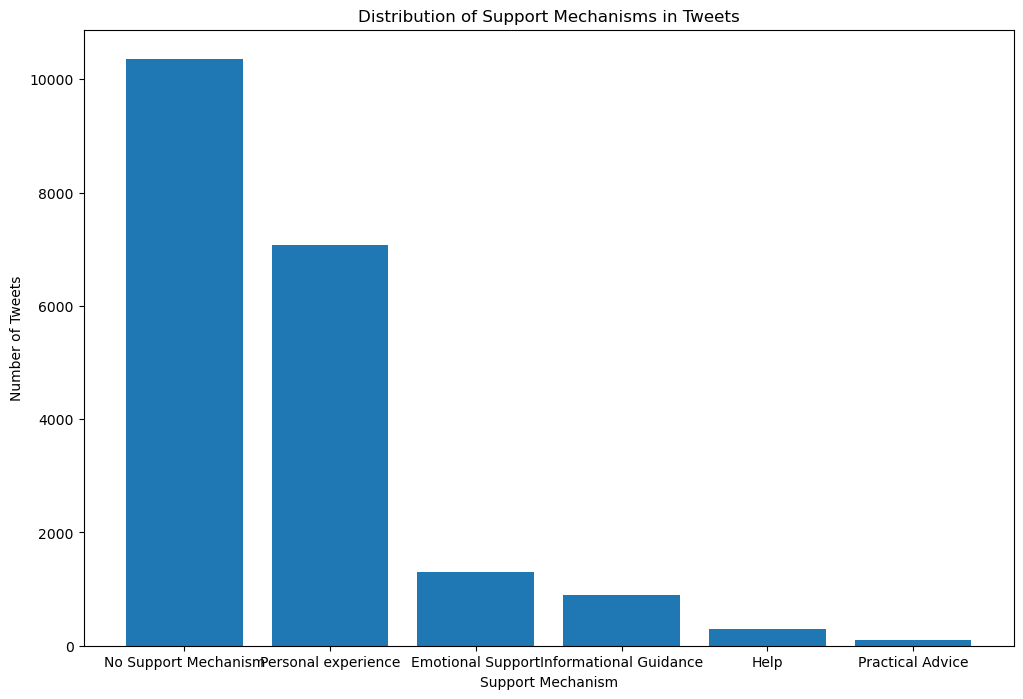

Tweets with Support Mechanism:
                                               post_text     support_mechanism
0      It's just over 2 years since I was diagnosed w...   Personal experience
1      It's Sunday, I need a break, so I'm planning t...   Personal experience
2      Awake but tired. I need to sleep but my brain ...   Personal experience
3      RT @SewHQ: #Retro bears make perfect gifts and...  No Support Mechanism
4      It’s hard to say whether packing lists are mak...  No Support Mechanism
...                                                  ...                   ...
19995              A day without sunshine is like night.  No Support Mechanism
19996  Boren's Laws: (1) When in charge, ponder. (2) ...  No Support Mechanism
19997  The flow chart is a most thoroughly oversold p...   Personal experience
19998  Ships are safe in harbor, but they were never ...   Personal experience
19999     Black holes are where God is dividing by zero.  No Support Mechanism

[20000 rows x 2 colu

In [ ]:
import matplotlib.pyplot as plt

# Assuming already defined the function identify_support_mechanism

# Apply the function to identify support mechanisms for each tweet
tweets['support_mechanism'] = tweets['post_text'].apply(identify_support_mechanism)

# Filter tweets with support mechanisms
tweets_with_support = tweets[tweets['support_mechanism'] != 'Personal Experience']

# Visualize the distribution of support mechanisms
support_mechanism_counts = tweets_with_support['support_mechanism'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 8))
plt.bar(support_mechanism_counts.index, support_mechanism_counts.values)
plt.title('Distribution of Support Mechanisms in Tweets')
plt.xlabel('Support Mechanism')
plt.ylabel('Number of Tweets')
plt.show()

# Display the tweets with identified support mechanisms
print("Tweets with Support Mechanism:")
print(tweets_with_support[['post_text', 'support_mechanism']])


In [ ]:
# Assuming 'positive_tweets' is DataFrame with positive sentiment tweets
tweets_with_support.to_csv('positive.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(tweets['post_text'], tweets['support_mechanism'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

y_pred = svm_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("TF-IDF Model:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Accuracy: 0.914
Classification Report:
                        precision    recall  f1-score   support

     Emotional Support       1.00      0.86      0.92       263
                  Help       0.83      0.91      0.87        55
Informational Guidance       0.98      0.74      0.84       178
  No Support Mechanism       0.88      0.99      0.93      2115
   Personal experience       0.97      0.83      0.89      1374
      Practical Advice       1.00      0.33      0.50        15

              accuracy                           0.91      4000
             macro avg       0.94      0.78      0.83      4000
          weighted avg       0.92      0.91      0.91      4000



### Support Vector Machines for support mechanism
SVC with count

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = tweets['post_text']
y = tweets['support_mechanism']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_bow, y_train)

y_pred = svm_model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("SVC with Count Model:")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

Accuracy: 0.93275
Classification Report:
                        precision    recall  f1-score   support

     Emotional Support       1.00      0.89      0.94       263
                  Help       0.87      0.95      0.90        55
Informational Guidance       0.97      0.80      0.88       178
  No Support Mechanism       0.91      0.99      0.95      2115
   Personal experience       0.96      0.88      0.92      1374
      Practical Advice       1.00      0.27      0.42        15

              accuracy                           0.93      4000
             macro avg       0.95      0.80      0.84      4000
          weighted avg       0.94      0.93      0.93      4000



### TF-IDF with Word2vec

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# DataFrame 'df' with columns 'text' and 'support_category'
# Adjust these column names based on actual dataset
X = tweets['post_text']
y = tweets['support_mechanism']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train an SVM model on TF-IDF features
svm_tfidf_model = SVC(kernel='linear')
svm_tfidf_model.fit(X_train_tfidf, y_train)

# Make predictions on the TF-IDF test set
y_pred_tfidf = svm_tfidf_model.predict(X_test_tfidf)

# Evaluate the TF-IDF model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("TF-IDF Model:")
print(f"Accuracy: {accuracy_tfidf}")
print("Classification Report:")
print(report_tfidf)

# Word Embeddings (Word2Vec) representation
tokenized_text = [word_tokenize(text) for text in X]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors to represent documents
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0
    for word in words:
        if word in model.wv:
            feature_vector = np.add(feature_vector, model.wv[word])
            nwords += 1
    if nwords > 0:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Create document vectors using Word2Vec
X_train_w2v = [average_word_vectors(words, word2vec_model, 100) for words in X_train]
X_test_w2v = [average_word_vectors(words, word2vec_model, 100) for words in X_test]

# Train an SVM model on Word2Vec features
svm_w2v_model = SVC(kernel='linear')
svm_w2v_model.fit(X_train_w2v, y_train)

# Make predictions on the Word2Vec test set
y_pred_w2v = svm_w2v_model.predict(X_test_w2v)

# Evaluate the Word2Vec model
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
report_w2v = classification_report(y_test, y_pred_w2v)

print("\nWord2Vec Model:")
print(f"Accuracy: {accuracy_w2v}")
print("Classification Report:")
print(report_w2v)


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

TF-IDF Model:
Accuracy: 0.9134350763072304
Classification Report:
                        precision    recall  f1-score   support

     Emotional Support       1.00      0.82      0.90       272
                  Help       0.88      0.90      0.89        50
Informational Guidance       0.98      0.80      0.88       180
  No Support Mechanism       0.87      1.00      0.93      2051
   Personal experience       0.97      0.83      0.89      1428
      Practical Advice       1.00      0.31      0.48        16

              accuracy                           0.91      3997
             macro avg       0.95      0.78      0.83      3997
          weighted avg       0.92      0.91      0.91      3997



C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):



Word2Vec Model:
Accuracy: 0.5131348511383538
Classification Report:
                        precision    recall  f1-score   support

     Emotional Support       0.00      0.00      0.00       272
                  Help       0.00      0.00      0.00        50
Informational Guidance       0.00      0.00      0.00       180
  No Support Mechanism       0.51      1.00      0.68      2051
   Personal experience       0.00      0.00      0.00      1428
      Practical Advice       0.00      0.00      0.00        16

              accuracy                           0.51      3997
             macro avg       0.09      0.17      0.11      3997
          weighted avg       0.26      0.51      0.35      3997



C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

### Bert Encoding for support mechanism

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.preprocessing import LabelEncoder

# DataFrame 'tweets' with columns 'post_text' and 'support_category'
# Adjust these column names based on actual dataset
X = tweets['post_text']
y = tweets['support_mechanism']

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
tweets['support_category_encoded'] = label_encoder.fit_transform(tweets['support_mechanism'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, tweets['support_category_encoded'], test_size=0.2, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(tweets['support_category_encoded'].unique()))

# Tokenize and encode the text data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Convert to PyTorch tensors
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train.values)
)

test_dataset = TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test.values)
)

# Define DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set up GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop (adjust as needed)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

for epoch in range(3):  # Adjust the number of epochs
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Convert labels to torch.LongTensor
        labels = labels.long()

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Decode labels back to original categories
decoded_labels = label_encoder.inverse_transform(all_labels)

# Print classification report
target_names = tweets['support_mechanism'].unique()
print(classification_report(decoded_labels, label_encoder.inverse_transform(all_preds), target_names=target_names))


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyboardInterrupt: 

### DistilBert Encoding for support mechanism

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.preprocessing import LabelEncoder

# DataFrame 'tweets' with columns 'post_text' and 'support_category'
# Adjust these column names based on actual dataset
X = tweets['post_text']
y = tweets['support_mechanism']

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the target variable
tweets['support_category_encoded'] = label_encoder.fit_transform(tweets['support_mechanism'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, tweets['support_category_encoded'], test_size=0.2, random_state=42)

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(tweets['support_category_encoded'].unique()))

# Tokenize and encode the text data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

# Convert to PyTorch tensors
train_dataset = TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_encodings['attention_mask']),
    torch.tensor(y_train.values)
)

test_dataset = TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask']),
    torch.tensor(y_test.values)
)

# Define DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Set up GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop (adjust as needed)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

for epoch in range(3):  # Adjust the number of epochs
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        # Convert labels to torch.LongTensor
        labels = labels.long()

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Decode labels back to original categories
decoded_labels = label_encoder.inverse_transform(all_labels)

# Print classification report
target_names = tweets['support_mechanism'].unique()
print(classification_report(decoded_labels, label_encoder.inverse_transform(all_preds), target_names=target_names))


C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


C:\Users\aditi\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aditi\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifier.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 93763584 bytes.

# Resource Engagement

C:\Users\aditi\AppData\Local\Temp\ipykernel_11012\1908710748.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_https['urls'] = df_with_https['post_text'].apply(lambda x: re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))


URL: https://t.co/
Tweet: RT @Kat_McNamara: Thanks @NickDSagar! Needed that...  #whycantwebefriends #ClaryNeedsAHug @shadowhunterstv #shadowhunterschat https://t.co/…

URL: https://t.c
Tweet: RT @jdmiles11: Addison PD protesters tonight demand answers after off duty Farmer's Branch officer kills teen suspect CBS11 10p https://t.c…

URL: https://t.co
Tweet: RT @LJMU: 98% of our postgrads are in work/further study within 6 months of graduating - visit &amp; discover your #LJMUPG options https://t.co…

URL: https://t.
Tweet: RT @WeslehW: happy birthday little sister ur all grown up now look @ all of these gr8 memories growing up 2gether @AcaciaBrinley https://t.…

URL: https://t
Tweet: RT @jdmiles11: #Breaking missing Frisco woman found dead in car. Her 3 kids are alive, unharmed and have been taken to a hospital https://t…

URL: https://t.co/QiKUQPR46p
Tweet: RT @HamillHimself: She took a little piece of all of us with her. #TooSoon https://t.co/QiKUQPR46p

URL: https://t.co/R9Xo7IBKmh
T

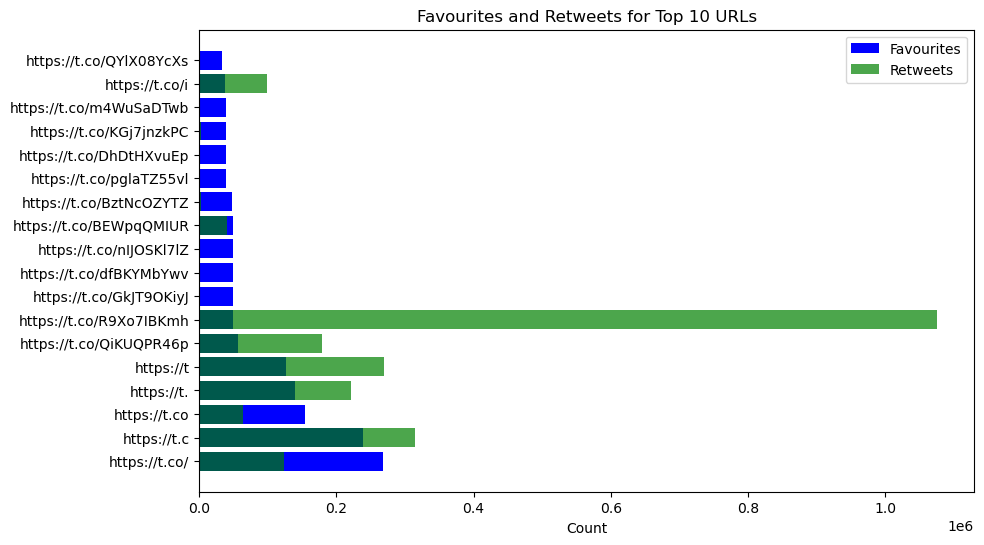

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


             urls  favourites  retweets  \
17  https://t.co/      268207    123158   
15    https://t.c      238445    315136   
16   https://t.co      154467     64415   
14     https://t.      139590    221270   
13      https://t      127274    269320   

                                            post_text  
17  RT @Kat_McNamara: Thanks @NickDSagar! Needed t...  
15  RT @jdmiles11: Addison PD protesters tonight d...  
16  RT @LJMU: 98% of our postgrads are in work/fur...  
14  RT @WeslehW: happy birthday little sister ur a...  
13  RT @jdmiles11: #Breaking missing Frisco woman ...  
                                           cleaned_text predicted_sentiment
17    rt thanks nickdsagar needed whycantwebefriends...            positive
15    rt addison pd protesters tonight demand answer...            negative
16    rt ljmu postgrads study within months graduati...             neutral
14    rt weslehw happy birthday little sister ur gro...            positive
13    rt breaking missing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame 'df' with columns 'post_text', 'favourites', and 'retweets'
# Select rows containing 'https' in the post_text
df_with_https = df[df['post_text'].str.contains('https', case=False, regex=False)]

# Extract URLs from the 'post_text' column using a regular expression
df_with_https['urls'] = df_with_https['post_text'].apply(lambda x: re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))

# Explode the DataFrame to have one row for each URL
df_exploded = df_with_https.explode('urls')

# Aggregate engagement metrics for each URL
url_metrics = df_exploded.groupby('urls').agg({'favourites': 'sum', 'retweets': 'sum', 'post_text': 'first'}).reset_index()

# Sort the DataFrame by total favourites or retweets, if desired
url_metrics = url_metrics.sort_values(by='favourites', ascending=False)
#url_metrics = url_metrics.drop_duplicates(subset='favourites')

# Select the top 10 URLs
top_10_urls = url_metrics['urls'][:18]

# Print the text of the tweets for the top 10 URLs
for url in top_10_urls:
    tweet_text = url_metrics.loc[url_metrics['urls'] == url, 'post_text'].values[0]
    print(f"URL: {url}\nTweet: {tweet_text}\n{'='*50}\n")

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(top_10_urls, url_metrics.loc[url_metrics['urls'].isin(top_10_urls), 'favourites'], color='blue', label='Favourites')
plt.barh(top_10_urls, url_metrics.loc[url_metrics['urls'].isin(top_10_urls), 'retweets'], color='green', label='Retweets', alpha=0.7)

#x_range = np.max(url_metrics.loc[url_metrics['urls'].isin(top_10_urls), 'retweets']) - np.min(url_metrics.loc[url_metrics['urls'].isin(top_10_urls), 'favourites'])
#interval = max(10, int(x_range/10))
#plt.xticks(np.arange(np.min(url_metrics.loc[url_metrics['urls'].isin(top_10_urls), 'favourites']), np.max(url_metrics.loc[url_metrics['urls'].isin(top_10_urls), 'retweets']) + 1, interval))

plt.xlabel('Count')
plt.title('Favourites and Retweets for Top 10 URLs')
plt.legend()
plt.show()
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load mental health tweet dataset
#df = pd.read_csv('your_dataset.csv')

SA_df = url_metrics
# Explore the dataset
print(SA_df.head())

# Preprocess the data
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    return ' '.join(words)

SA_df['cleaned_text'] = SA_df['post_text'].apply(preprocess_text)

# Sentiment analysis using NLTK's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the entire dataset
SA_df['predicted_sentiment'] = SA_df['cleaned_text'].apply(analyze_sentiment)

# Display the results
print(SA_df[['cleaned_text', 'predicted_sentiment']])
negative_tweets = SA_df[SA_df['predicted_sentiment'] == 'negative']
print(negative_tweets)
top_10_urls = negative_tweets['urls'][4:18:3]

plt.figure(figsize=(10, 6))
plt.barh(top_10_urls, negative_tweets.loc[negative_tweets['urls'].isin(top_10_urls), 'favourites'], color='blue', label='Favourites')
plt.barh(top_10_urls, negative_tweets.loc[negative_tweets['urls'].isin(top_10_urls), 'retweets'], color='green', label='Retweets', alpha=0.7)

plt.xlabel('Count')
plt.title('Favourites and Retweets for Top 10 URLs')
plt.legend()
plt.show()

In [ ]:
url_metrics

,urls,favourites,retweets,post_text
17,https://t.co/,268207,123158,RT @Kat_McNamara: Thanks @NickDSagar! Needed t...
15,https://t.c,238445,315136,RT @jdmiles11: Addison PD protesters tonight d...
16,https://t.co,154467,64415,RT @LJMU: 98% of our postgrads are in work/fur...
14,https://t.,139590,221270,RT @WeslehW: happy birthday little sister ur a...
13,https://t,127274,269320,RT @jdmiles11: #Breaking missing Frisco woman ...
...,...,...,...,...
938,https://t.co/AFYDP9JPw8,22,0,@KellyannePolls YOU are a propagandist in th...
1865,https://t.co/KcoDJv3vPP,22,0,⚡️ “Trump makes 'unpresidented' spelling error...
1724,https://t.co/J5Mk4hyBiP,22,0,Do you think Trump has ever seen a person of c...
4040,https://t.co/kK0U6mDWRo,0,0,cope w depression w/o meds on Pinterest | http...


In [ ]:
df_exploded

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,urls
32,32,6.359270e+17,Mon Aug 24 21:29:56 +0000 2015,How lovely #PandaStory https://t.co/GgaVEkymp7,1.013187e+09,84,211,251,837,0,1,https://t.co/GgaVEkymp7
34,34,6.358800e+17,Mon Aug 24 18:21:05 +0000 2015,That's good news at least https://t.co/1S0L7ZAqjr,1.013187e+09,84,211,251,837,0,1,https://t.co/1S0L7ZAqjr
41,41,6.357110e+17,Mon Aug 24 07:12:24 +0000 2015,Truly so awful 😟 https://t.co/jI4Lw4K8co,1.013187e+09,84,211,251,837,0,1,https://t.co/jI4Lw4K8co
50,50,6.355270e+17,Sun Aug 23 18:59:52 +0000 2015,The awfulness of it continues. Heartbreaking 😟...,1.013187e+09,84,211,251,837,0,1,https://t.co/wdZELWA3ah
59,59,6.351870e+17,Sat Aug 22 20:29:57 +0000 2015,I hope the pilot pulls through. There's been e...,1.013187e+09,84,211,251,837,1,1,https://t.co/6whLQe3pk8
...,...,...,...,...,...,...,...,...,...,...,...,...
19616,19635,8.100830e+17,Sat Dec 17 11:23:35 +0000 2016,User:MissionTrailCameras19 https://t.co/sOrpDU...,1.458226e+09,1197,701,1156,61856,0,0,https://t.co/sOrpDUZQH0
19617,19636,8.100830e+17,Sat Dec 17 11:23:35 +0000 2016,User:MissionTrailCameras19 https://t.co/jpnMmr...,1.458226e+09,1197,701,1156,61856,0,0,https://t.co/jpnMmrjLTd
19618,19637,8.100830e+17,Sat Dec 17 11:23:34 +0000 2016,User:Nitrobuild03 https://t.co/sedxiIGB26,1.458226e+09,1197,701,1156,61856,0,0,https://t.co/sedxiIGB26
19619,19638,8.100660e+17,Sat Dec 17 10:14:10 +0000 2016,Boob Job UK https://t.co/HsPiQwoR3g,1.458226e+09,1197,701,1156,61856,0,0,https://t.co/HsPiQwoR3g


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Load your mental health tweet dataset
#df = pd.read_csv('your_dataset.csv')

SA_df = url_metrics
# Explore the dataset
print(SA_df.head())

# Preprocess the data
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)

    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    return ' '.join(words)

SA_df['cleaned_text'] = SA_df['post_text'].apply(preprocess_text)

# Sentiment analysis using NLTK's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the entire dataset
SA_df['predicted_sentiment'] = SA_df['cleaned_text'].apply(analyze_sentiment)

# Display the results
print(SA_df[['cleaned_text', 'predicted_sentiment']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


             urls  favourites  retweets  \
17  https://t.co/      268207    123158   
15    https://t.c      238445    315136   
16   https://t.co      154467     64415   
14     https://t.      139590    221270   
13      https://t      127274    269320   

                                            post_text  
17  RT @Kat_McNamara: Thanks @NickDSagar! Needed t...  
15  RT @jdmiles11: Addison PD protesters tonight d...  
16  RT @LJMU: 98% of our postgrads are in work/fur...  
14  RT @WeslehW: happy birthday little sister ur a...  
13  RT @jdmiles11: #Breaking missing Frisco woman ...  
                                           cleaned_text predicted_sentiment
17    rt thanks nickdsagar needed whycantwebefriends...            positive
15    rt addison pd protesters tonight demand answer...            negative
16    rt ljmu postgrads study within months graduati...             neutral
14    rt weslehw happy birthday little sister ur gro...            positive
13    rt breaking missing

In [ ]:
negative_tweets = SA_df[SA_df['predicted_sentiment'] == 'negative']
print(negative_tweets)

                         urls  favourites  retweets  \
15                https://t.c      238445    315136   
13                  https://t      127274    269320   
2439  https://t.co/R9Xo7IBKmh       49408   1075594   
3845           https://t.co/i       38229     98472   
4318  https://t.co/nPkschauAC       32804         0   
...                       ...         ...       ...   
4530  https://t.co/pxW8GIlQBY          22         0   
3614  https://t.co/fFd4WAE2Bn          22         0   
4525  https://t.co/pvJxy3uECD          22         0   
1865  https://t.co/KcoDJv3vPP          22         0   
4040  https://t.co/kK0U6mDWRo           0         0   

                                              post_text  \
15    RT @jdmiles11: Addison PD protesters tonight d...   
13    RT @jdmiles11: #Breaking missing Frisco woman ...   
2439  RT @HamillHimself: no words #Devastated https:...   
3845  RT @brokechicana: I hate when people reply to ...   
4318         True as fuck bro.  https://t.co

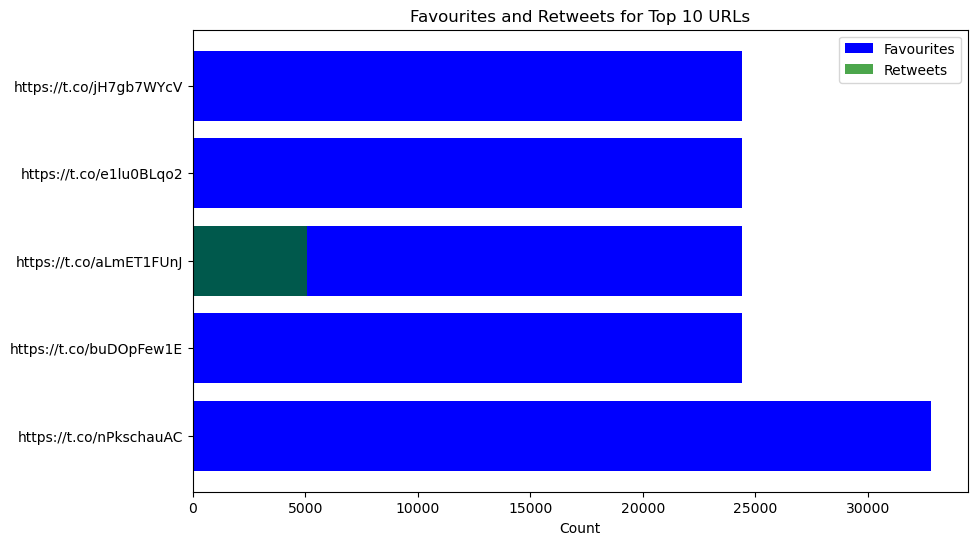

In [ ]:
top_10_urls = negative_tweets['urls'][4:18:3]

plt.figure(figsize=(10, 6))
plt.barh(top_10_urls, negative_tweets.loc[negative_tweets['urls'].isin(top_10_urls), 'favourites'], color='blue', label='Favourites')
plt.barh(top_10_urls, negative_tweets.loc[negative_tweets['urls'].isin(top_10_urls), 'retweets'], color='green', label='Retweets', alpha=0.7)

plt.xlabel('Count')
plt.title('Favourites and Retweets for Top 10 URLs')
plt.legend()
plt.show()

In [ ]:
negative_tweets

,urls,favourites,retweets,post_text,cleaned_text,predicted_sentiment
15,https://t.c,238445.0,315136.0,RT @jdmiles11: Addison PD protesters tonight d...,rt addison pd protesters tonight demand answer...,negative
13,https://t,127274.0,269320.0,RT @jdmiles11: #Breaking missing Frisco woman ...,rt breaking missing frisco woman found dead ca...,negative
2439,https://t.co/R9Xo7IBKmh,49408.0,1075594.0,RT @HamillHimself: no words #Devastated https:...,rt hamillhimself words devastated https,negative
3845,https://t.co/i,38229.0,98472.0,RT @brokechicana: I hate when people reply to ...,rt brokechicana hate people reply emo texts la...,negative
4318,https://t.co/nPkschauAC,32804.0,0.0,True as fuck bro. https://t.co/nPkschauAC,true fuck bro https,negative
...,...,...,...,...,...,...
3614,https://t.co/fFd4WAE2Bn,22.0,0.0,Write me a fake book......post it next to FAKE...,write fake book post next fake news https,negative
4525,https://t.co/pvJxy3uECD,22.0,0.0,@Morning_Joe Attempt to cover up fell flat! Un...,attempt cover fell flat unforced errors said s...,negative
1865,https://t.co/KcoDJv3vPP,22.0,0.0,⚡️ “Trump makes 'unpresidented' spelling error...,trump makes spelling error https spelling erro...,negative
4040,https://t.co/kK0U6mDWRo,0.0,0.0,cope w depression w/o meds on Pinterest | http...,cope w depression meds pinterest https,negative


In [ ]:
for url in top_10_urls:
    tweet_text = negative_tweets.loc[negative_tweets['urls'] == url, 'post_text'].values[0]
    print(f"URL: {url}\nTweet: {tweet_text}\n{'='*50}\n")

URL: https://t.co/nPkschauAC
Tweet: True as fuck bro.  https://t.co/nPkschauAC

URL: https://t.co/buDOpFew1E
Tweet: just so ya know this is the 2 year anniversary of his mom's death; he's likely gonna stay silent https://t.co/buDOpFew1E

URL: https://t.co/aLmET1FUnJ
Tweet: RT @jilIhoItzmann: this post is a gleaming ray of hope in this goddamn bitch of an unsatisfactory situation https://t.co/aLmET1FUnJ

URL: https://t.co/e1lu0BLqo2
Tweet: i miss scira so bad,,,,, https://t.co/e1lu0BLqo2

URL: https://t.co/jH7gb7WYcV
Tweet: instead of betraying lucifer, which would ensure that the killer would go to jail???¿¿¿ https://t.co/jH7gb7WYcV



# Sentiment and Temporal Analysis

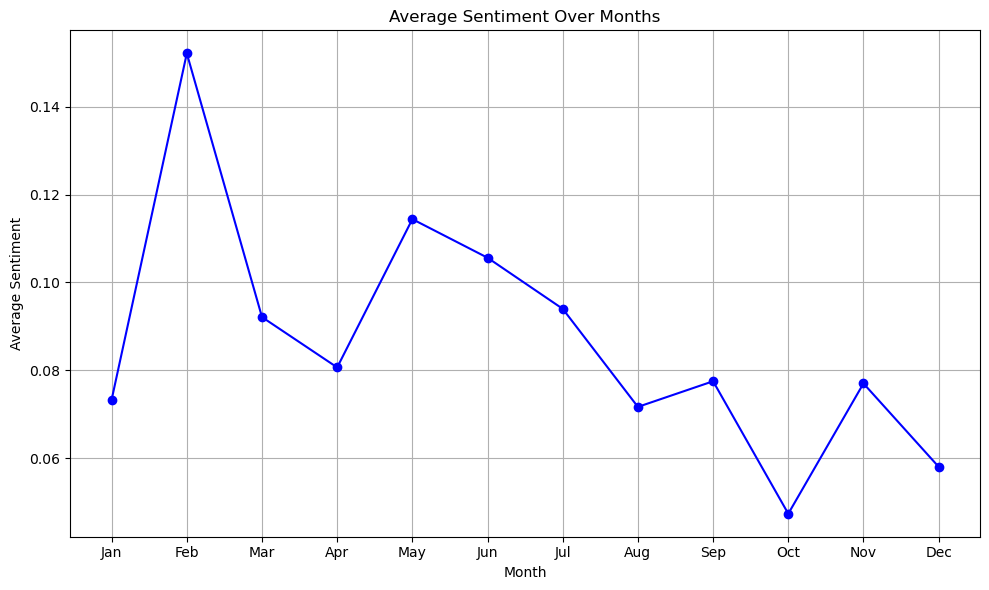

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# DataFrame 'df' with columns 'post_created' and 'post_text'
# Adjust these column names based on actual dataset
df['post_created'] = pd.to_datetime(df['post_created'], format='%a %b %d %H:%M:%S +0000 %Y')  # Adjust date format if needed

# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['post_text'].apply(get_sentiment)

# Aggregate sentiment scores by month
monthly_sentiment = df.groupby(df['post_created'].dt.month)['sentiment'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment.index, monthly_sentiment.values, marker='o', linestyle='-', color='b')
plt.title('Average Sentiment Over Months')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

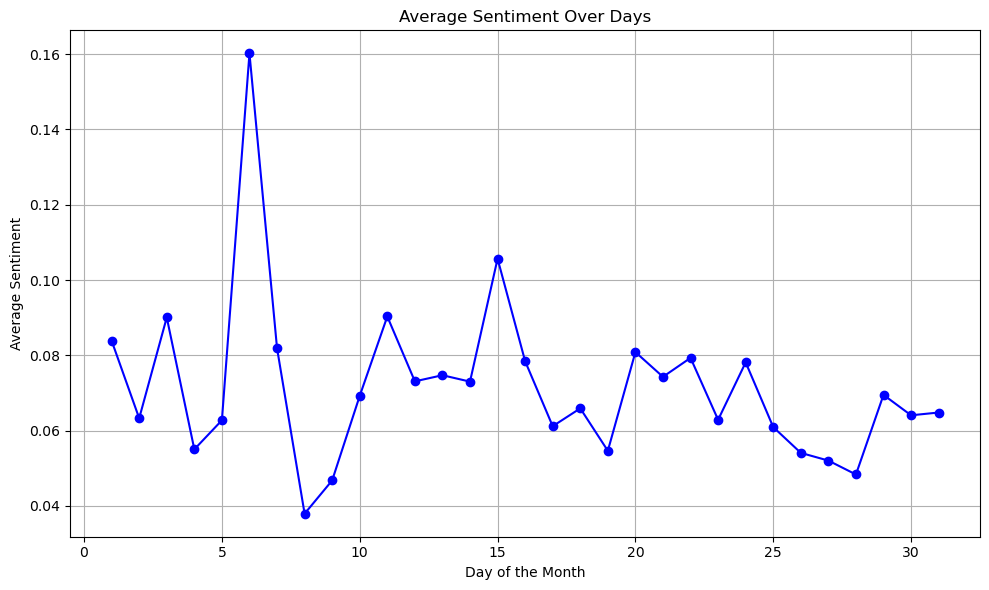

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# DataFrame 'df' with columns 'post_created' and 'post_text'
# Adjust these column names based on actual dataset
df['post_created'] = pd.to_datetime(df['post_created'], format='%a %b %d %H:%M:%S +0000 %Y')  # Adjust date format if needed

# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['post_text'].apply(get_sentiment)

# Extract temporal features
df['day'] = df['post_created'].dt.day

# Aggregate sentiment scores by day
daily_sentiment = df.groupby(df['day'])['sentiment'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-', color='b')
plt.title('Average Sentiment Over Days')
plt.xlabel('Day of the Month')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,year,month,day,hour,minute,second,sentiment,support_mechanism
0,0,637894677824413696,2015-08-30 07:48:37+00:00,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1,2015,8,30,7,48,37,0.100000,Personal experience
1,1,637890384576778240,2015-08-30 07:31:33+00:00,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1,2015,8,30,7,31,33,-0.093750,Personal experience
2,2,637749345908051968,2015-08-29 22:11:07+00:00,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1,2015,8,29,22,11,7,-0.262500,Personal experience
3,3,637696421077123073,2015-08-29 18:40:49+00:00,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1,2015,8,29,18,40,49,1.000000,No Support Mechanism
4,4,637696327485366272,2015-08-29 18:40:26+00:00,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1,2015,8,29,18,40,26,-0.045833,No Support Mechanism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,819336825231773698,2017-01-12 00:14:56+00:00,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0,2017,1,12,0,14,56,0.000000,No Support Mechanism
19996,19996,819334654260080640,2017-01-12 00:06:18+00:00,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0,2017,1,12,0,6,18,-0.475000,No Support Mechanism
19997,19997,819334503042871297,2017-01-12 00:05:42+00:00,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0,2017,1,12,0,5,42,0.500000,Personal experience
19998,19998,819334419374899200,2017-01-12 00:05:22+00:00,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0,2017,1,12,0,5,22,0.500000,Personal experience


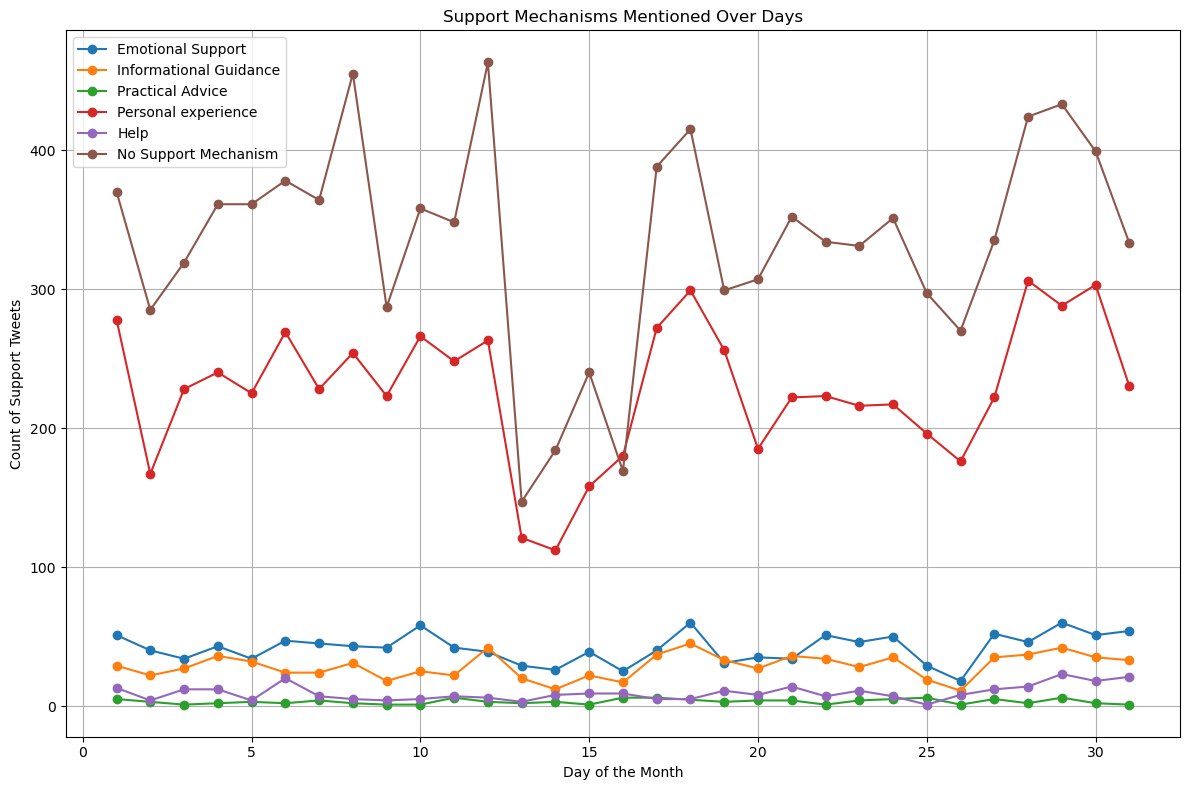

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame 'tweets' with columns 'post_created' and 'support_category'
# Adjust these column names based on actual dataset
tweets['post_created'] = pd.to_datetime(tweets['post_created'], format='%a %b %d %H:%M:%S +0000 %Y')  # Adjust date format if needed

# Extract temporal features
tweets['day'] = tweets['post_created'].dt.day

# Define the support categories in dataset
support_categories = ["Emotional Support", "Informational Guidance", "Practical Advice", "Personal experience", "Help","No Support Mechanism"]

# Create separate DataFrames for each support category
support_dfs = {category: tweets[tweets['support_mechanism'] == category] for category in support_categories}

# Aggregate support tweets by day for each category
daily_support_counts = {category: support_df.groupby('day').size() for category, support_df in support_dfs.items()}

# Plotting
plt.figure(figsize=(12, 8))

for category, counts in daily_support_counts.items():
    plt.plot(counts.index, counts.values, marker='o', linestyle='-', label=category)

plt.title('Support Mechanisms Mentioned Over Days')
plt.xlabel('Day of the Month')
plt.ylabel('Count of Support Tweets')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import pandas as pd

# DataFrame 'tweets' with columns 'post_text' and 'label' where 'label' is the ground truth sentiment
# Adjust these column names based on actual dataset
tweets['post_text'] = tweets['post_text'].astype(str)  # Ensure 'post_text' is of string type

# Split the data into train and test sets
train_data, test_data = train_test_split(tweets, test_size=0.2, random_state=42)

# Sentiment analysis using vaderSentiment (rule-based)
analyzer = SentimentIntensityAnalyzer()
test_data['vader_sentiment'] = test_data['post_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Sentiment analysis using BERT-based model
classifier = pipeline("sentiment-analysis")
results = classifier(test_data['post_text'].tolist())
test_data['bert_sentiment'] = [result['label'] == 'POSITIVE' for result in results]

# Evaluate VADER Sentiment
print("VADER Sentiment Analysis Metrics:")
print("Accuracy:", accuracy_score(test_data['label'], test_data['vader_sentiment'].apply(lambda x: 1 if x >= 0 else 0)))
print(classification_report(test_data['label'], test_data['vader_sentiment'].apply(lambda x: 1 if x >= 0 else 0)))
print("ROC-AUC Score:", roc_auc_score(test_data['label'], test_data['vader_sentiment']))

# Evaluate BERT-based model
print("\nBERT-based Model Sentiment Analysis Metrics:")
print("Accuracy:", accuracy_score(test_data['label'], test_data['bert_sentiment']))
print(classification_report(test_data['label'], test_data['bert_sentiment']))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


VADER Sentiment Analysis Metrics:
Accuracy: 0.46325
              precision    recall  f1-score   support

           0       0.43      0.25      0.32      1981
           1       0.48      0.67      0.56      2019

    accuracy                           0.46      4000
   macro avg       0.45      0.46      0.44      4000
weighted avg       0.45      0.46      0.44      4000

ROC-AUC Score: 0.4908329226712711

BERT-based Model Sentiment Analysis Metrics:
Accuracy: 0.488
              precision    recall  f1-score   support

           0       0.49      0.69      0.57      1981
           1       0.49      0.29      0.36      2019

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.47      4000
weighted avg       0.49      0.49      0.47      4000



C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
from textblob import TextBlob
import pandas as pd

# DataFrame 'tweets' with columns 'post_text' and 'label' where 'label' is the ground truth sentiment
# Adjust these column names based on actual dataset
tweets['post_text'] = tweets['post_text'].astype(str)  # Ensure 'post_text' is of string type

# Split the data into train and test sets
train_data, test_data = train_test_split(tweets, test_size=0.2, random_state=42)

# Sentiment analysis using VADER Sentiment (rule-based)
analyzer = SentimentIntensityAnalyzer()
test_data['vader_sentiment'] = test_data['post_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Sentiment analysis using BERT-based model
classifier = pipeline("sentiment-analysis")
results = classifier(test_data['post_text'].tolist())
test_data['bert_sentiment'] = [result['label'] == 'POSITIVE' for result in results]

# Sentiment analysis using TextBlob (rule-based)
test_data['textblob_sentiment'] = test_data['post_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Evaluate VADER Sentiment
vader_accuracy = accuracy_score(test_data['label'], test_data['vader_sentiment'].apply(lambda x: 1 if x >= 0 else 0))
vader_classification_report = classification_report(test_data['label'], test_data['vader_sentiment'].apply(lambda x: 1 if x >= 0 else 0))
vader_roc_auc = roc_auc_score(test_data['label'], test_data['vader_sentiment'])

# Evaluate BERT-based model
bert_accuracy = accuracy_score(test_data['label'], test_data['bert_sentiment'])
bert_classification_report = classification_report(test_data['label'], test_data['bert_sentiment'])

# Evaluate TextBlob
textblob_accuracy = accuracy_score(test_data['label'], test_data['textblob_sentiment'].apply(lambda x: 1 if x >= 0 else 0))
textblob_classification_report = classification_report(test_data['label'], test_data['textblob_sentiment'].apply(lambda x: 1 if x >= 0 else 0))
textblob_roc_auc = roc_auc_score(test_data['label'], test_data['textblob_sentiment'])

# Create a table comparing the scores
comparison_table = pd.DataFrame({
    'Model': ['VADER Sentiment', 'BERT-based Model', 'TextBlob'],
    'Accuracy': [vader_accuracy, bert_accuracy, textblob_accuracy],
    'ROC-AUC': [vader_roc_auc, None, textblob_roc_auc],  # No ROC-AUC for BERT
    'Classification Report': [vader_classification_report, bert_classification_report, textblob_classification_report]
})

print(comparison_table)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sp

              Model  Accuracy   ROC-AUC  \
0   VADER Sentiment   0.46325  0.490833   
1  BERT-based Model   0.48800       NaN   
2          TextBlob   0.48800  0.502806   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  


In [ ]:
comparison_table

,Model,Accuracy,ROC-AUC,Classification Report
0,VADER Sentiment,0.46325,0.490833,precision recall f1-score ...
1,BERT-based Model,0.48800,NaN,precision recall f1-score ...
2,TextBlob,0.48800,0.502806,precision recall f1-score ...


In [ ]:
# Display the comparison table in Markdown format
print(comparison_table.to_markdown(index=False))


| Model            |   Accuracy |    ROC-AUC | Classification Report                                 |
|:-----------------|-----------:|-----------:|:------------------------------------------------------|
| VADER Sentiment  |    0.46325 |   0.490833 | precision    recall  f1-score   support               |
|                  |            |            |                                                       |
|                  |            |            |            0       0.43      0.25      0.32      1981 |
|                  |            |            |            1       0.48      0.67      0.56      2019 |
|                  |            |            |                                                       |
|                  |            |            |     accuracy                           0.46      4000 |
|                  |            |            |    macro avg       0.45      0.46      0.44      4000 |
|                  |            |            | weighted avg       0.45   